In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
iris = pd.read_csv('iris.csv', header=0)

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
X = iris.drop('species', axis=1)    
y = iris['species']

In [18]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
scaler = MinMaxScaler()
scaler  = scaler.fit(X_train)
Scaled_X_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units = 4, activation='relu',input_shape=[4,]))


/Users/shilpabhandari/Desktop/Iris-Data-Analysis-and-Deployment/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
from tensorflow.keras.callbacks import EarlyStopping


In [31]:
early_stop = EarlyStopping(patience= 10)

In [32]:
model.fit(Scaled_X_train, y_train, epochs=300, validation_data=(scaled_x_test,y_test), callbacks=[early_stop], verbose=1)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3650 - loss: 1.1285 - val_accuracy: 0.2667 - val_loss: 1.1771
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3077 - loss: 1.1529 - val_accuracy: 0.2667 - val_loss: 1.1734
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3692 - loss: 1.1300 - val_accuracy: 0.2667 - val_loss: 1.1709
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3723 - loss: 1.1269 - val_accuracy: 0.2667 - val_loss: 1.1681
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3713 - loss: 1.1269 - val_accuracy: 0.2667 - val_loss: 1.1653
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3369 - loss: 1.1371 - val_accuracy: 0.2667 - val_loss: 1.1624
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3650 - loss: 1.1236 - val_accuracy: 0.2667 - val_loss: 1.1599
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3483 - loss: 1.1295 - val_accuracy: 0.2667 - val_loss:

In [33]:
metrics = pd.DataFrame(model.history.history)

In [34]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.350,1.139193,0.266667,1.177111
1,0.350,1.137001,0.266667,1.173399
2,0.350,1.134507,0.266667,1.170868
3,0.350,1.132241,0.266667,1.168142
4,0.350,1.130185,0.266667,1.165284
...,...,...,...,...
295,0.875,0.382252,0.900000,0.429234
296,0.875,0.381421,0.900000,0.428185
297,0.875,0.380533,0.900000,0.427391
298,0.875,0.379616,0.900000,0.426413


<Axes: >

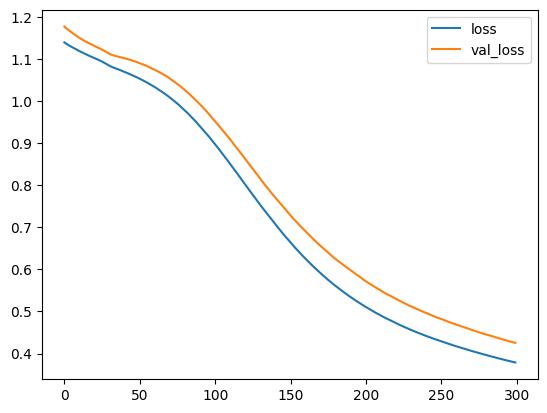

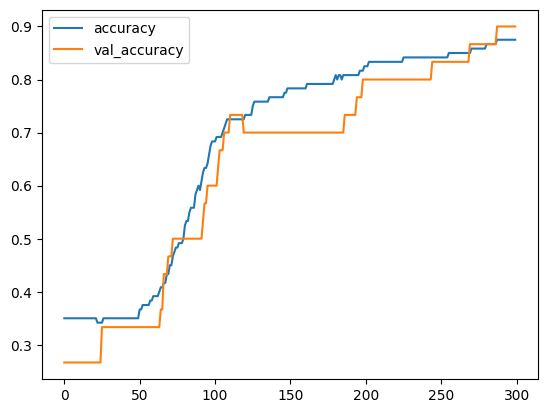

In [35]:
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [37]:
model.evaluate(scaled_x_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9000 - loss: 0.4253


[0.4253021776676178, 0.8999999761581421]

In [38]:
epochs=len(metrics)

In [39]:
#using all the data for training the model that's going to be deployed
scaled_X = scaler.fit_transform(X)

In [40]:
model = Sequential()
model.add(Dense(units = 4, activation='relu',input_shape=[4,]))


/Users/shilpabhandari/Desktop/Iris-Data-Analysis-and-Deployment/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
model.fit(scaled_X, y, epochs=epochs)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3008 - loss: 1.1407  
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3490 - loss: 1.1185 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3516 - loss: 1.1163 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 1.1154 
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3346 - loss: 1.1194 
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3299 - loss: 1.1150 
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3147 - loss: 1.1171 
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3403 - loss: 1.1100 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3477 - loss: 1.1041 
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3399 - loss: 1.1038 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3560 - loss: 1.0988 
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3234 - l

In [43]:
model.save('iris_model.h5')

In [45]:
import joblib
joblib.dump(scaler, 'iris_scaler.pkl')


['iris_scaler.pkl']

In [46]:
from tensorflow.keras.models import load_model
flower_model = load_model('iris_model.h5')
scaler = joblib.load('iris_scaler.pkl')

In [47]:
flower_example = {"sepal_length": 5.1, "sepal_width": 3.5, "petal_length": 1.4, "petal_width": 0.2} 

In [48]:
def return_prediction(model, scaler, sample_json):
    s_len   = sample_json['sepal_length']
    s_width = sample_json['sepal_width']
    p_len   = sample_json['petal_length']
    p_width = sample_json['petal_width']
    flower = [[s_len, s_width, p_len, p_width]]

    classes = np.array(['setosa', 'versicolor', 'virginica'])
    flower = scaler.transform(flower)
    class_ind = model.predict_classes(flower)[0]
    return classes[class_ind]

In [49]:
##CODE FOR DEPLOYMENT

In [52]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np
flower_model = load_model('iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')
def return_prediction(model, scaler, sample_json):
    s_len   = sample_json['sepal_length']
    s_width = sample_json['sepal_width']
    p_len   = sample_json['petal_length']
    p_width = sample_json['petal_width']
    flower = [[s_len, s_width, p_len, p_width]]

    classes = np.array(['setosa', 'versicolor', 'virginica'])
    flower = scaler.transform(flower)
    class_ind = model.predict_classes(flower)[0]
    return classes[class_ind]